In [19]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import glob
import os
import math
from os import listdir
import data_visualization as dv
import dill
import scipy 
from scipy.stats import norm
from scipy import stats
from tqdm import tqdm 
import random
import sys

wheel = dv.ColorWheel()

In [20]:
sys.path.insert(0, r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Exp1\Scripts\Analysis_and_Statistics') 
from plot_functions import *
import Subject_Object_First_Half
import Subject_Object_Second_Half


# Initial Thangs

In [21]:
plt.style.use('cashaback_dark')
wheel = dv.ColorWheel()

# Initial thangs
os.chdir('D:\\Subject_Data\\Seth_MatchPennies_Agent_Exp1')
PATH = os.getcwd()
SAVE_PATH = r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Group_Figures\Exp1\\'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# Fields pull and pull list
os.chdir('D:\Subject_Data\Seth_MatchPennies_Agent_Exp1')
PATH = os.getcwd()
figures_pull_list = []
figures_pull_list_control = []
figures_pull_list_task = []
fields_pull = []
with open(PATH+"\\Figures_Pull_List.txt", "r") as pull_file:
    figures_pull_list = pull_file.read().splitlines()
with open(PATH+"\\Fields_Pull.txt", "r") as fields_pull:
    fields_pull = fields_pull.read().splitlines()
num_subjects = len(figures_pull_list)

task_name = 'Seth_MatchPennies_Agent_Exp1'
tp3_title = "1000 (50)"
tp4_title = "1000 (150)"
tp5_title = '1100 (50)'
tp6_title = "1100 (150)"
tp7_title = "1200 (50)"
tp8_title = '1200 (150)'
trial_block_titles = ["1000 (50)", "1000 (150)", '1100 (50)',"1100 (150)", "1200 (50)",  '1200 (150)']
num_blocks = len(trial_block_titles)


num_subjects

20

# Pickle Objects

In [22]:
NUM_STDS = 2
append_dict = {0:'reaction_time_no_sd_off',1:'reaction_time_minus_sd',2:'reaction_time_minus_2sd'}
load_path = r'D:\Subject_Data\Seth_MatchPennies_Agent_Exp1\Subjects_Analyzed\\'
subject_first = dill.load((open(load_path + f'subject_object_first_half_{append_dict[NUM_STDS]}_dict.pkl', 'rb')))
subject_second = dill.load((open(load_path + f'subject_object_second_half_{append_dict[NUM_STDS]}_dict.pkl', 'rb')))
group_first = dill.load((open(load_path + f'group_object_first_half_{append_dict[NUM_STDS]}.pkl', 'rb')))
group_second = dill.load((open(load_path + f'group_object_second_half_{append_dict[NUM_STDS]}.pkl', 'rb')))
group_first.analyze_data()
group_second.analyze_data()

C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Exp1\Scripts\Analysis_and_Statistics\Subject_Object_First_Half.py:476: RuntimeWarning: Mean of empty slice
  self.perc_binned_player_wins_mean                      = np.nanmean(self.combine_all_subjects('perc_binned_player_wins'),axis = 0)
C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Exp1\Scripts\Analysis_and_Statistics\Subject_Object_First_Half.py:477: RuntimeWarning: Mean of empty slice
  self.perc_binned_player_indecisions_mean               = np.nanmean(self.combine_all_subjects('perc_binned_player_indecisions'),axis = 0)
C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Exp1\Scripts\Analysis_and_Statistics\Subject_Object_First_Half.py:478: RuntimeWarning: Mean of empty slice
  self.perc_binned_player_incorrects_mean                = np.nanmean(self.combine_all_subjects('per

# Set Save 

In [23]:
save = False

# Histograms

# Box Plots

Decision Times

In [24]:
group_first.combine_all_subjects('player_task_leave_time').shape

(20, 6, 40)

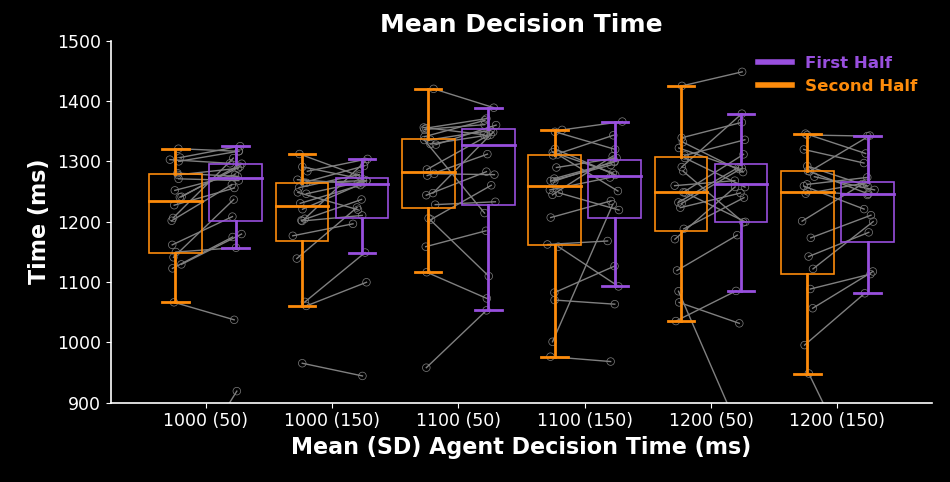

In [25]:
metric1 = group_first.combine_all_subjects('player_task_leave_time_mean') 
metric2 = group_second.combine_all_subjects('player_task_leave_time_mean') 

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))*0.75
ylocs = np.arange(900,1600,100)
bw = 0.75
multi_boxplot(ax,metric1,xlocs=xlocs-bw/1.75,box_width = bw,colors = wheel.rak_orange)
multi_boxplot(ax,metric2,xlocs=xlocs+bw/1.75,box_width = bw,colors = wheel.purple)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-bw/1.75,bw/1.75])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric1[:,j],metric2[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.75,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.75,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Mean Decision Time')

dv.Custom_Legend(ax,labels=['First Half','Second Half'],colors=[wheel.purple,wheel.rak_orange],fontsize=12)

axmain.set_axis_off()
plt.show()

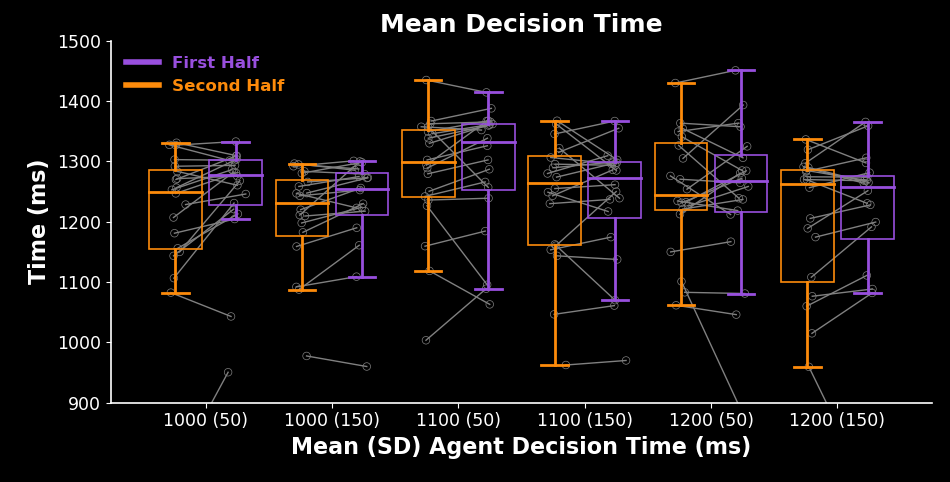

In [26]:
metric1 = group_first.combine_all_subjects('player_task_leave_time_median') 
metric2 = group_second.combine_all_subjects('player_task_leave_time_median') 

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))*0.75
ylocs = np.arange(900,1600,100)
bw = 0.75
multi_boxplot(ax,metric1,xlocs=xlocs-bw/1.75,box_width = bw,colors = wheel.rak_orange)
multi_boxplot(ax,metric2,xlocs=xlocs+bw/1.75,box_width = bw,colors = wheel.purple)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-bw/1.75,bw/1.75])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric1[:,j],metric2[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.75,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.75,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Mean Decision Time')

dv.Custom_Legend(ax,labels=['First Half','Second Half'],colors=[wheel.purple,wheel.rak_orange],fontsize=12)

axmain.set_axis_off()
plt.show()

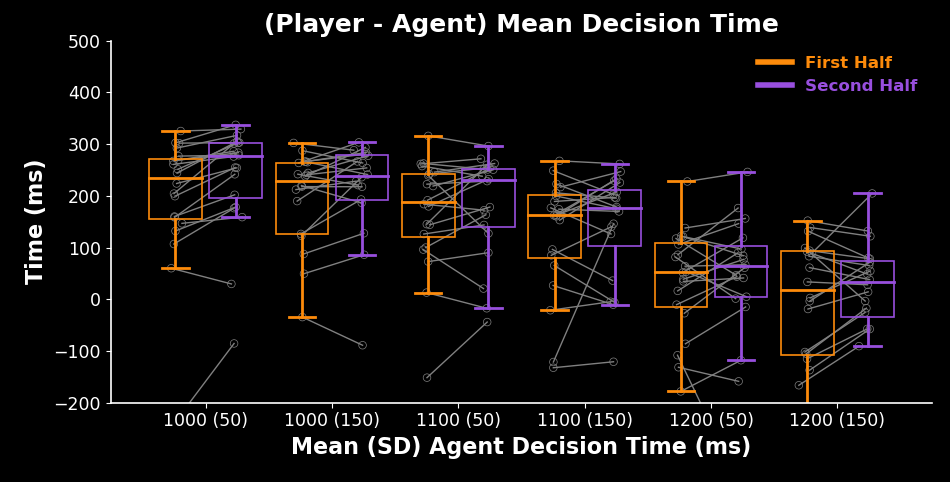

In [27]:
metric1 = group_first.combine_all_subjects('player_minus_agent_task_leave_time_mean') 
metric2 = group_second.combine_all_subjects('player_minus_agent_task_leave_time_mean') 

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))*0.75
ylocs = np.arange(-200,600,100)
bw = 0.75
multi_boxplot(ax,metric1,xlocs=xlocs-bw/1.75,box_width = bw,colors = wheel.rak_orange)
multi_boxplot(ax,metric2,xlocs=xlocs+bw/1.75,box_width = bw,colors = wheel.purple)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-bw/1.75,bw/1.75])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric1[:,j],metric2[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.75,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.75,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('(Player - Agent) Mean Decision Time')

dv.Custom_Legend(ax,labels=['First Half','Second Half'],colors=[wheel.rak_orange,wheel.purple],fontsize=12)

axmain.set_axis_off()
plt.show()

Wins

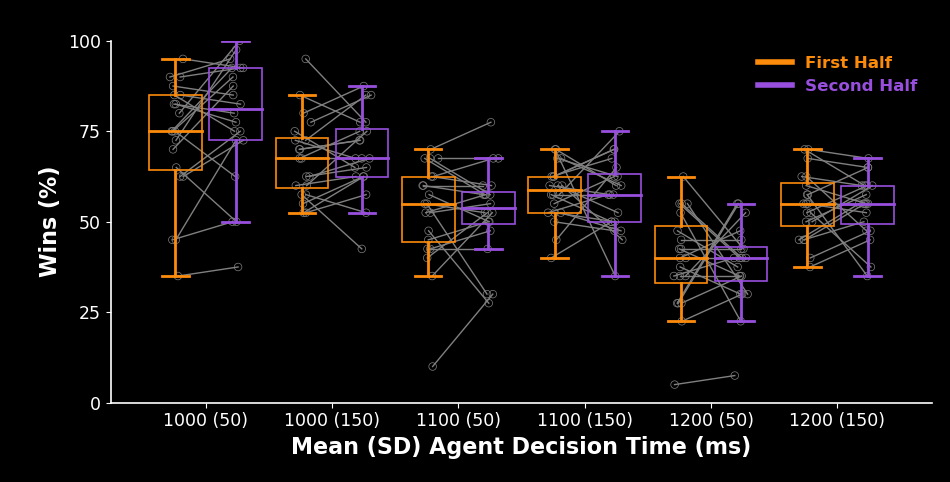

In [28]:
metric1 = group_first.combine_all_subjects('player_perc_wins') 
metric2 = group_second.combine_all_subjects('player_perc_wins') 

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))*0.75
ylocs = np.arange(0,125,25)
bw = 0.75
multi_boxplot(ax,metric1,xlocs=xlocs-bw/1.75,box_width = bw,colors = wheel.rak_orange)
multi_boxplot(ax,metric2,xlocs=xlocs+bw/1.75,box_width = bw,colors = wheel.purple)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-bw/1.75,bw/1.75])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric1[:,j],metric2[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.75,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.75,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Wins (%)')
ax.set_title('')

dv.Custom_Legend(ax,labels=['First Half','Second Half'],colors=[wheel.rak_orange,wheel.purple],fontsize=12)

axmain.set_axis_off()
plt.show()

Indecisions

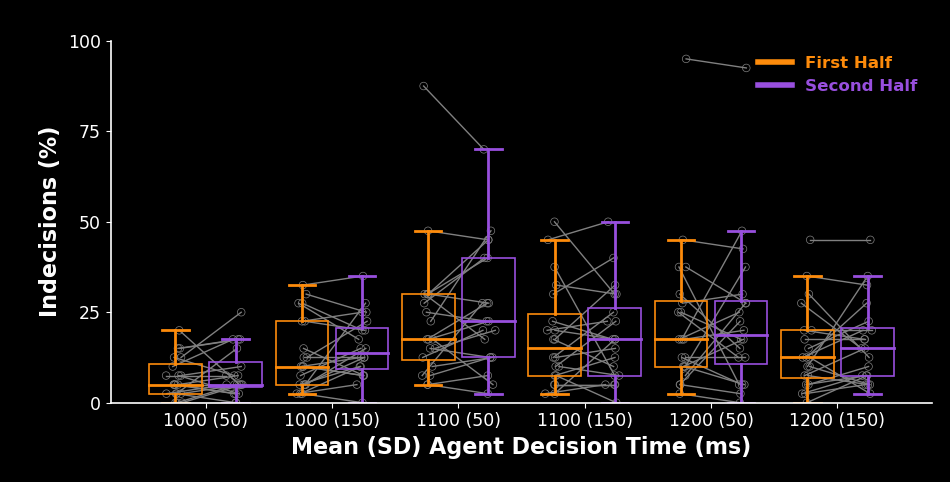

In [29]:
metric1 = group_first.combine_all_subjects('player_perc_indecisions') 
metric2 = group_second.combine_all_subjects('player_perc_indecisions') 

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))*0.75
ylocs = np.arange(0,125,25)
bw = 0.75
multi_boxplot(ax,metric1,xlocs=xlocs-bw/1.75,box_width = bw,colors = wheel.rak_orange)
multi_boxplot(ax,metric2,xlocs=xlocs+bw/1.75,box_width = bw,colors = wheel.purple)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-bw/1.75,bw/1.75])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric1[:,j],metric2[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.75,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.75,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Indecisions (%)')
dv.Custom_Legend(ax,labels=['First Half','Second Half'],colors=[wheel.rak_orange,wheel.purple],fontsize=12)

axmain.set_axis_off()
plt.show()

Incorrects

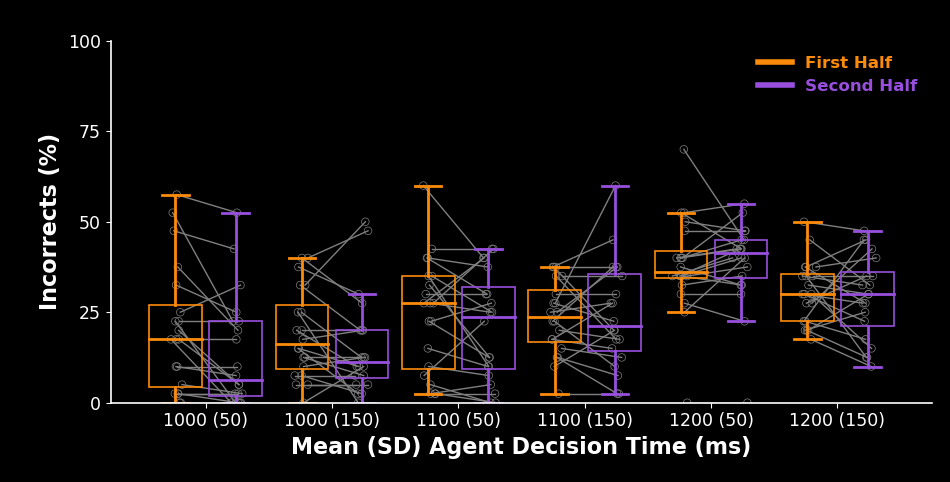

In [30]:
metric1 = group_first.combine_all_subjects('player_perc_incorrects') 
metric2 = group_second.combine_all_subjects('player_perc_incorrects') 

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))*0.75
ylocs = np.arange(0,125,25)
bw = 0.75
multi_boxplot(ax,metric1,xlocs=xlocs-bw/1.75,box_width = bw,colors = wheel.rak_orange)
multi_boxplot(ax,metric2,xlocs=xlocs+bw/1.75,box_width = bw,colors = wheel.purple)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-bw/1.75,bw/1.75])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric1[:,j],metric2[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.75,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.75,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Incorrects (%)')
ax.set_title('')

dv.Custom_Legend(ax,labels=['First Half','Second Half'],colors=[wheel.rak_orange,wheel.purple],fontsize=12)

axmain.set_axis_off()
plt.show()

### Reaction and Gamble


First Half Second Half Reaction and Gamble Decisions

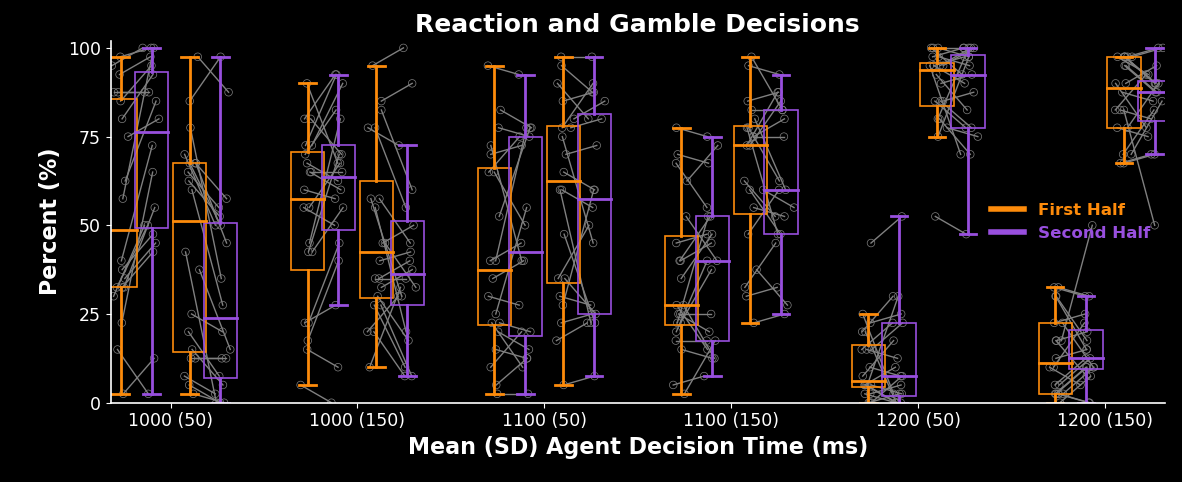

In [31]:
metric1a = group_first.combine_all_subjects('perc_reaction_decisions') 
metric1b = group_second.combine_all_subjects('perc_reaction_decisions') 
metric2a = group_first.combine_all_subjects('perc_gamble_decisions') 
metric2b = group_second.combine_all_subjects('perc_gamble_decisions') 

w,h = 15,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))*0.75
ylocs = np.arange(0,125,25)
bw = 0.4
multi_boxplot(ax,metric1a,xlocs=xlocs-1.5*bw,box_width = bw,colors = wheel.rak_orange)
multi_boxplot(ax,metric1b,xlocs=xlocs-bw/1.75,box_width = bw,colors = wheel.purple)
multi_boxplot(ax,metric2a,xlocs=xlocs+bw/1.75,box_width = bw,colors = wheel.rak_orange)
multi_boxplot(ax,metric2b,xlocs=xlocs+1.5*bw,box_width = bw,colors = wheel.purple)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-1.5*bw,-bw/1.75])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric1a[:,j],metric1b[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)
        x_pos = m + np.array([bw/1.75,1.5*bw])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric2a[:,j],metric2b[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.75,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.75,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs)+2)

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Percent (%)')
ax.set_title('Reaction and Gamble Decisions')

dv.Custom_Legend(ax,labels=['First Half','Second Half'],colors=[wheel.rak_orange,wheel.purple],fontsize=12)

axmain.set_axis_off()
plt.show()

Reaction and Gamble Mean Decision Time

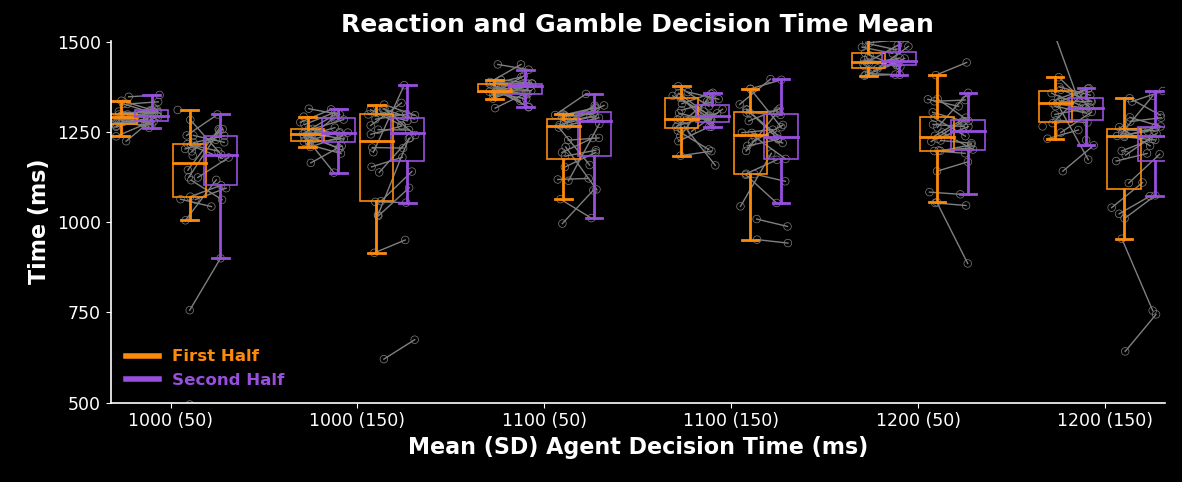

In [32]:
metric1a = group_first.combine_all_subjects('player_reaction_leave_time_median') 
metric1b = group_second.combine_all_subjects('player_reaction_leave_time_median') 
metric2a = group_first.combine_all_subjects('player_gamble_leave_time_median') 
metric2b = group_second.combine_all_subjects('player_gamble_leave_time_median') 

w,h = 15,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))*0.75
ylocs = np.arange(500,1600,250)
bw = 0.4
multi_boxplot(ax,metric1a,xlocs=xlocs-1.5*bw,box_width = bw,colors = wheel.rak_orange)
multi_boxplot(ax,metric1b,xlocs=xlocs-bw/1.75,box_width = bw,colors = wheel.purple)
multi_boxplot(ax,metric2a,xlocs=xlocs+bw/1.75,box_width = bw,colors = wheel.rak_orange)
multi_boxplot(ax,metric2b,xlocs=xlocs+1.5*bw,box_width = bw,colors = wheel.purple)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-1.5*bw,-bw/1.75])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric1a[:,j],metric1b[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)
        x_pos = m + np.array([bw/1.75,1.5*bw])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric2a[:,j],metric2b[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.75,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.75,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs)+2)

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Reaction and Gamble Decision Time Mean')

dv.Custom_Legend(ax,labels=['First Half','Second Half'],colors=[wheel.rak_orange,wheel.purple],fontsize=12)

axmain.set_axis_off()
plt.show()

SD of Reaction and Gamble Decision Time

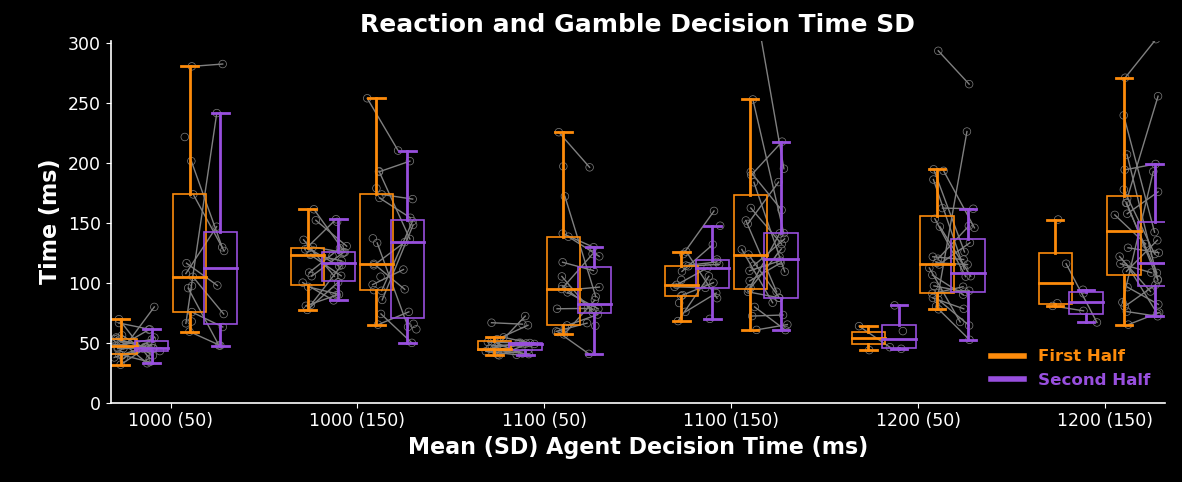

In [33]:
metric1a = group_first.combine_all_subjects('player_reaction_leave_time_sd') 
metric1b = group_second.combine_all_subjects('player_reaction_leave_time_sd') 
metric2a = group_first.combine_all_subjects('player_gamble_leave_time_sd') 
metric2b = group_second.combine_all_subjects('player_gamble_leave_time_sd') 

w,h = 15,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))*0.75
ylocs = np.arange(0,350,50)
bw = 0.4
multi_boxplot(ax,metric1a,xlocs=xlocs-1.5*bw,box_width = bw,colors = wheel.rak_orange)
multi_boxplot(ax,metric1b,xlocs=xlocs-bw/1.75,box_width = bw,colors = wheel.purple)
multi_boxplot(ax,metric2a,xlocs=xlocs+bw/1.75,box_width = bw,colors = wheel.rak_orange)
multi_boxplot(ax,metric2b,xlocs=xlocs+1.5*bw,box_width = bw,colors = wheel.purple)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-1.5*bw,-bw/1.75])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric1a[:,j],metric1b[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)
        x_pos = m + np.array([bw/1.75,1.5*bw])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric2a[:,j],metric2b[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.75,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.75,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs)+2)

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Reaction and Gamble Decision Time SD')

dv.Custom_Legend(ax,labels=['First Half','Second Half'],colors=[wheel.rak_orange,wheel.purple],fontsize=12)

axmain.set_axis_off()
plt.show()